In [1]:
from pyarrow import csv
import pandas as pd
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_auc_score

In [3]:
import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, RepeatVector, TimeDistributed, InputLayer, Reshape, Dropout
from tensorflow.keras.layers import Embedding, Dense, Flatten, BatchNormalization, LeakyReLU, Flatten, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
def roc_curve_multiclass(model, test_iter, y_test):
    y_score = model.predict(test_iter)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    plt.figure(figsize=(10,6))
    plt.plot(fpr["micro"], tpr["micro"],
            label = "micro-average ROC curve (area = {0:0.2f})""".format(roc_auc["micro"]),
            color="deeppink", linestyle = ":", linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    colors = cycle(['tab:red', 'tab:orange', 'gold', "tab:green",
                    "tab:blue", "tab:purple", "tab:brown", "magenta"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class, ROC-AUC')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
NGIDS = csv.read_csv("./NGIDS_PAT_sliding_387_8.csv").to_pandas()

In [6]:
NGIDS

,sys1,sys2,sys3,sys4,sys5,sys6,sys7,sys8,sys9,sys10,...,sys379,sys380,sys381,sys382,sys383,sys384,sys385,sys386,sys387,attack_cat
0,46,73,45,32,74,73,75,71,32,76,...,46,73,46,35,69,35,68,70,33,0
1,32,76,49,29,19,76,57,76,25,76,...,33,32,32,66,32,66,46,66,46,0
2,25,76,76,57,76,25,57,77,76,32,...,46,66,46,46,66,66,46,46,46,0
3,76,32,32,78,32,18,66,43,26,44,...,46,66,66,46,55,46,4,55,46,0
4,26,44,25,55,26,46,43,20,20,47,...,46,46,71,58,66,46,58,55,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486017,65,254,33,33,32,74,32,32,32,32,...,71,71,71,71,71,71,71,71,58,0
486018,32,32,32,65,254,65,254,65,254,65,...,58,58,71,58,33,32,32,32,33,0
486019,254,65,254,65,254,65,254,65,254,65,...,33,32,32,32,33,33,32,32,32,0
486020,254,65,254,65,254,65,254,65,254,65,...,32,32,32,32,33,33,4,36,31,0


In [7]:
NGIDS["attack_cat"].value_counts()

0    475879
1      6079
4      1885
2      1455
5       435
3       180
7        60
6        49
Name: attack_cat, dtype: int64

In [8]:
X = NGIDS[NGIDS.columns[-388:-1]].values

In [9]:
y = NGIDS["attack_cat"]

In [10]:
Y = np.zeros(len(y))
for i, v in enumerate(y):
    if v != 0:
        Y[i] = 1

In [11]:
del NGIDS

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_vali, y_test, y_vali = train_test_split(X_test, y_test, test_size=0.5, random_state=43)

In [20]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=256)

In [ ]:
X_train = pca.fit_transform(X_train)
X_vali = pca.transform(X_vali)
X_test = pca.transform(X_test)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN, SMOTE

In [ ]:
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=44)

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
def y_encoding(y_, classes):
    tmp=tf.keras.utils.to_categorical(y_, num_classes=classes)
    tmp=tmp.reshape(-1,classes).astype(np.float32)
    return tmp

In [ ]:
y_train = y_encoding(y_train, 2)
y_vali = y_encoding(y_vali, 2)
y_test = y_encoding(y_test, 2)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_vali = scaler.transform(X_vali)
# X_test = scaler.transform(X_test)

In [14]:
LR = 1e-3
EPOCHS=200
EARLY_STOP=3
BATCH = 512

In [15]:
def seq_model():
    return Sequential([
        Embedding(1700, 64, input_length=387),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

In [16]:
model = seq_model()

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=["accuracy", tf.keras.metrics.AUC()])

In [18]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss',
                             verbose=1)

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=EARLY_STOP)
history = model.fit(X_train, y_train, validation_data=(X_vali, y_vali), epochs=EPOCHS, callbacks=[callback, checkpoint], batch_size=BATCH)

Epoch 1/200
570/570 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9870 - auc: 0.7215
Epoch 00001: val_loss improved from inf to 0.06485, saving model to my_checkpoint.ckpt
570/570 [==============================] - 160s 280ms/step - loss: 0.0756 - accuracy: 0.9870 - auc: 0.7215 - val_loss: 0.0649 - val_accuracy: 0.9878 - val_auc: 0.7732
Epoch 2/200
570/570 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9879 - auc: 0.7668
Epoch 00002: val_loss did not improve from 0.06485
570/570 [==============================] - 159s 279ms/step - loss: 0.0640 - accuracy: 0.9879 - auc: 0.7668 - val_loss: 0.0650 - val_accuracy: 0.9879 - val_auc: 0.7654
Epoch 3/200
570/570 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9881 - auc: 0.7675
Epoch 00003: val_loss did not improve from 0.06485
570/570 [==============================] - 156s 273ms/step - loss: 0.0638 - accuracy: 0.9881 - auc: 0.7675 - val_loss: 0.0653 - val_accuracy: 0.

Epoch 25/200
570/570 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9881 - auc: 0.8217
Epoch 00025: val_loss improved from 0.06271 to 0.06244, saving model to my_checkpoint.ckpt
570/570 [==============================] - 154s 271ms/step - loss: 0.0608 - accuracy: 0.9881 - auc: 0.8217 - val_loss: 0.0624 - val_accuracy: 0.9880 - val_auc: 0.8192
Epoch 26/200
570/570 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9881 - auc: 0.8312
Epoch 00026: val_loss did not improve from 0.06244
570/570 [==============================] - 155s 271ms/step - loss: 0.0602 - accuracy: 0.9881 - auc: 0.8312 - val_loss: 0.0645 - val_accuracy: 0.9879 - val_auc: 0.7600
Epoch 27/200
570/570 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9881 - auc: 0.8034
Epoch 00027: val_loss did not improve from 0.06244
570/570 [==============================] - 154s 271ms/step - loss: 0.0616 - accuracy: 0.9881 - auc: 0.8034 - val_loss: 0.0626 - val_accur

Epoch 48/200
570/570 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9955 - auc: 0.9666
Epoch 00048: val_loss improved from 0.02571 to 0.02477, saving model to my_checkpoint.ckpt
570/570 [==============================] - 154s 271ms/step - loss: 0.0214 - accuracy: 0.9955 - auc: 0.9666 - val_loss: 0.0248 - val_accuracy: 0.9953 - val_auc: 0.9466
Epoch 49/200
570/570 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9960 - auc: 0.9696
Epoch 00049: val_loss did not improve from 0.02477
570/570 [==============================] - 154s 271ms/step - loss: 0.0197 - accuracy: 0.9960 - auc: 0.9696 - val_loss: 0.0251 - val_accuracy: 0.9953 - val_auc: 0.9620
Epoch 50/200
570/570 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9958 - auc: 0.9708
Epoch 00050: val_loss improved from 0.02477 to 0.02434, saving model to my_checkpoint.ckpt
570/570 [==============================] - 155s 271ms/step - loss: 0.0198 - accuracy: 0.9958 - au

Epoch 72/200
570/570 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9981 - auc: 0.9911
Epoch 00072: val_loss did not improve from 0.01713
570/570 [==============================] - 155s 271ms/step - loss: 0.0078 - accuracy: 0.9981 - auc: 0.9911 - val_loss: 0.0184 - val_accuracy: 0.9966 - val_auc: 0.9679
Epoch 73/200
570/570 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9980 - auc: 0.9909
Epoch 00073: val_loss improved from 0.01713 to 0.01532, saving model to my_checkpoint.ckpt
570/570 [==============================] - 155s 272ms/step - loss: 0.0080 - accuracy: 0.9980 - auc: 0.9909 - val_loss: 0.0153 - val_accuracy: 0.9971 - val_auc: 0.9715
Epoch 74/200
570/570 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9985 - auc: 0.9949
Epoch 00074: val_loss did not improve from 0.01532
570/570 [==============================] - 155s 272ms/step - loss: 0.0060 - accuracy: 0.9985 - auc: 0.9949 - val_loss: 0.0182 - val_accur

570/570 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994 - auc: 0.9984
Epoch 00096: val_loss did not improve from 0.01223
570/570 [==============================] - 155s 272ms/step - loss: 0.0021 - accuracy: 0.9994 - auc: 0.9984 - val_loss: 0.0144 - val_accuracy: 0.9976 - val_auc: 0.9756
Epoch 97/200
570/570 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9991 - auc: 0.9978
Epoch 00097: val_loss did not improve from 0.01223
570/570 [==============================] - 155s 272ms/step - loss: 0.0033 - accuracy: 0.9991 - auc: 0.9978 - val_loss: 0.0139 - val_accuracy: 0.9977 - val_auc: 0.9768


In [20]:
model.load_weights(checkpoint_path)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

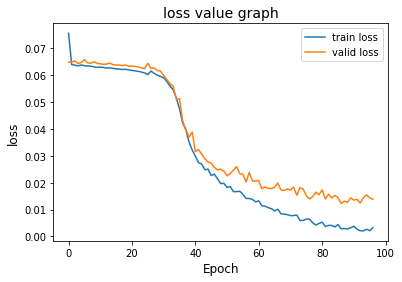

In [22]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
# plt.yscale("logit")
plt.title("loss value graph", fontsize=14)
plt.show()

In [23]:
# roc_curve_multiclass(model, X_test, y_test)

In [24]:
y_pred_ = model.predict(X_test)

In [25]:
y_pred = []
for i in y_pred_:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

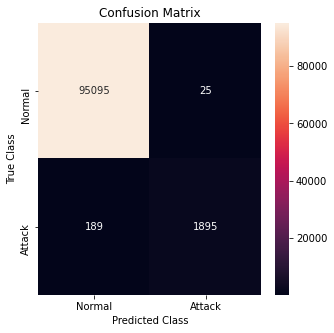

In [27]:
LABELS = ['Normal', 'Attack']
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [28]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(y_test, y_pred_)
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

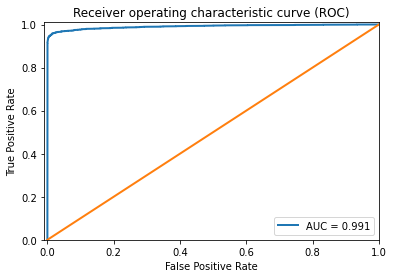

In [29]:
plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [30]:
Recall = conf_matrix[1][1]/(np.sum(conf_matrix[1]))
Recall

0.9093090211132437

In [31]:
Precision = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
Precision

0.9869791666666666

In [32]:
F1_Score = 2*(Recall*Precision)/(Recall+Precision)
F1_Score

0.9465534465534465